In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats


In [15]:
filepath = "Resources/countries.csv"
eco_csv = pd.read_csv(filepath, header=0)
eco_csv.head()
eco_csv.fillna(0, inplace=True)

eco_csv['GDP per Capita'] = eco_csv['GDP per Capita'].replace('[\$,]', '', regex=True).astype(float)
eco_csv.head()



,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.94,-4.44,3.11,5.70,2


In [16]:
eco_df = eco_csv[['Country', 'Region', 'Total Ecological Footprint', 'Biocapacity Deficit or Reserve']]
eco_df.head()

,Country,Region,Total Ecological Footprint,Biocapacity Deficit or Reserve
0,Afghanistan,Middle East/Central Asia,0.79,-0.30
1,Albania,Northern/Eastern Europe,2.21,-1.03
2,Algeria,Africa,2.12,-1.53
3,Angola,Africa,0.93,1.61
4,Antigua and Barbuda,Latin America,5.38,-4.44


In [17]:
# convert GDP per Capita to float
gdp_df = eco_csv[eco_csv.columns[4]].replace('[\$,]', '', regex=True).astype(float)
# gdp_df.head()
print(gdp_df.mean())
print(gdp_df.median())
print(gdp_df.max())
print(gdp_df.min())


13102.28835106383
4687.38
114665.0
0.0


In [18]:
merged_df = pd.merge(eco_df, gdp_df, left_index= True, right_index = True).set_index("Region")
merged_df.head()

,Country,Total Ecological Footprint,Biocapacity Deficit or Reserve,GDP per Capita
Region,,,,
Middle East/Central Asia,Afghanistan,0.79,-0.30,614.66
Northern/Eastern Europe,Albania,2.21,-1.03,4534.37
Africa,Algeria,2.12,-1.53,5430.57
Africa,Angola,0.93,1.61,4665.91
Latin America,Antigua and Barbuda,5.38,-4.44,13205.10


In [19]:
meanregion_df = merged_df.groupby("Region").mean()
meanregion_df

,Total Ecological Footprint,Biocapacity Deficit or Reserve,GDP per Capita
Region,,,
Africa,1.670962,0.591923,2565.521538
Asia-Pacific,2.970303,-0.143030,10344.901212
European Union,5.475385,-1.826923,35819.146923
Latin America,3.483846,6.080513,6873.249744
Middle East/Central Asia,4.054348,-3.081304,15657.038696
North America,7.386667,-0.756667,57498.900000
Northern/Eastern Europe,3.763333,-0.880833,21373.183333


In [20]:
for_countries = merged_df[["Country","Biocapacity Deficit or Reserve","GDP per Capita"]]

country_pivot = pd.pivot_table(for_countries, columns = ("Country"))
dev_countries = country_pivot[["Austria", "Belgium", "Denmark", "Finland", "France", "Germany", "Greece", "Ireland", 
              "Italy", "Luxembourg", "Netherlands", "Portugal", "Spain", "Sweden", "United Kingdom",
              "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Estonia", "Hungary", "Latvia", "Lithuania","Poland", "Romania", "Slovakia", "Slovenia", "Norway", "Switzerland",
              "Australia", "Canada", "Japan", "New Zealand", "United States of America","Canada", "Japan", "France", "Germany"]]
dev_economies = country_pivot[["Canada", "Japan", "France", "Germany", "Italy","United Kingdom", "United States of America"]]
dev_countries

Country,Austria,Belgium,Denmark,Finland,France,Germany,Greece,Ireland,Italy,Luxembourg,...,Switzerland,Australia,Canada,Japan,New Zealand,United States of America,Canada,Japan,France,Germany
Biocapacity Deficit or Reserve,-3.0,-6.25,-0.73,7.57,-2.04,-3.02,-2.77,-1.83,-3.53,-14.14,...,-4.48,7.26,7.83,-4.3,4.54,-4.46,7.83,-4.3,-2.04,-3.02
GDP per Capita,51274.1,48053.30,61413.60,50960.20,45430.30,46822.40,25987.40,52853.60,38412.00,114665.00,...,88506.20,66604.20,52145.40,46201.6,37488.30,49725.00,52145.40,46201.6,45430.30,46822.40


In [21]:
undev_countries = country_pivot[["Angola", "Benin", "Burkina Faso", "Burundi", "Central African Republic","Chad","Comoros","Djibouti","Equatorial Guinea","Eritrea","Ethiopia","Gambia","Guinea","Guinea-Bissau","Lesotho","Liberia","Madagascar","Malawi","Mali","Mauritania","Mozambique","Niger","Rwanda","Senegal","Sierra Leone","Somalia","Togo","Uganda","Zambia","Cambodia","Myanmar","Afghanistan","Bangladesh","Nepal","Yemen","Haiti"]]
undev_countries

Country,Angola,Benin,Burkina Faso,Burundi,Central African Republic,Chad,Comoros,Djibouti,Equatorial Guinea,Eritrea,...,Togo,Uganda,Zambia,Cambodia,Myanmar,Afghanistan,Bangladesh,Nepal,Yemen,Haiti
Biocapacity Deficit or Reserve,1.61,-0.53,-0.22,-0.48,6.62,0.57,-0.70,-1.42,0.44,0.88,...,-0.60,-0.66,1.24,-0.11,0.41,-0.30,-0.35,-0.38,-0.53,-0.34
GDP per Capita,4665.91,746.83,671.07,276.69,495.04,1161.22,860.24,1433.17,24064.00,439.73,...,580.86,601.35,1740.64,877.64,1117.58,614.66,857.50,700.07,1302.30,749.13


In [22]:
developing_c = country_pivot[["Azerbaijan","Kazakhstan", "Indonesia", "Algeria", "Angola","Cameroon", "Chad","Congo","Egypt","Bolivia","Colombia","Ecuador","Russian Federation","Turkmenistan","Uzbekistan","Bahrain","Kuwait","Oman","Qatar","Saudi Arabia","United Arab Emirates","Yemen"]]
developing_c

Country,Azerbaijan,Kazakhstan,Indonesia,Algeria,Angola,Cameroon,Chad,Congo,Egypt,Bolivia,...,Russian Federation,Turkmenistan,Uzbekistan,Bahrain,Kuwait,Oman,Qatar,Saudi Arabia,United Arab Emirates,Yemen
Biocapacity Deficit or Reserve,-1.46,-2.14,-0.32,-1.53,1.61,0.52,0.57,9.63,-1.59,13.77,...,1.1,-2.68,-1.40,-6.91,-7.58,-5.6,-9.56,-5.12,-7.37,-0.53
GDP per Capita,7106.04,11278.00,3688.53,5430.57,4665.91,1271.21,1161.22,1943.69,2930.33,2253.09,...,13320.2,5290.14,1560.85,24299.00,41830.50,22622.8,99431.50,23593.80,40817.40,1302.30


In [23]:
bins =[-1, 1000, 5000, 15000, 40000, 60000, 100000]
labels = ["< $1000", "< $5000", "< $15000", "< $40000", "< $60000", "< $100000"]
merged_df["GDP Categories"] = pd.cut(merged_df["GDP per Capita"], bins, labels=labels)
# print(merged_df["GDP per Capita"])
merged_df.head()
bio_vs_gdp = merged_df[["Biocapacity Deficit or Reserve", "Total Ecological Footprint","GDP per Capita","GDP Categories"]]
# bio_vs_gdp.groupby("GDP Categories").mean()
bio_vs_gdp.head()
# gdp_cat_df = pd.pivot_table(bio_vs_gdp, columns = ("GDP Categories"))
# gdp_cat_df

,Biocapacity Deficit or Reserve,Total Ecological Footprint,GDP per Capita,GDP Categories
Region,,,,
Middle East/Central Asia,-0.30,0.79,614.66,< $1000
Northern/Eastern Europe,-1.03,2.21,4534.37,< $5000
Africa,-1.53,2.12,5430.57,< $15000
Africa,1.61,0.93,4665.91,< $5000
Latin America,-4.44,5.38,13205.10,< $15000


In [24]:
gdp_4_plot = bio_vs_gdp.groupby("GDP Categories").mean()
gdp_4_plot

,Biocapacity Deficit or Reserve,Total Ecological Footprint,GDP per Capita
GDP Categories,,,
< $1000,1.859773,1.999773,397.018182
< $5000,1.687843,2.002745,2567.908235
< $15000,1.498039,3.318431,8887.558627
< $40000,-2.647895,5.474211,25254.100000
< $60000,-2.369375,6.396875,48767.868750
< $100000,-2.630000,7.436000,77316.360000


In [25]:
def gendata(loc1=0, loc2=0):
    B_or_R = gdp_4_plot["Biocapacity Deficit or Reserve"].tolist()
    G_per_C = gdp_4_plot["GDP per Capita"].tolist()


In [26]:
# Generate some data and show the scatter plot
# B_or_R, G_per_C = gendata()

TypeError: 'NoneType' object is not iterable

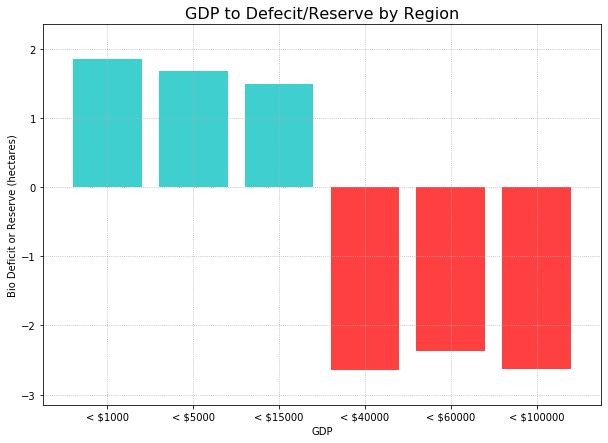

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
ticks = gdp_4_plot.index
x_ticks = np.arange(len(ticks))
y_values = gdp_4_plot["Biocapacity Deficit or Reserve"].tolist()
ax.set_xticks(x_ticks)
plt.xlim(-0.75, len(x_ticks)-0.25)
plt.ylim(min(y_values)-.5, max(y_values)+.5)

# Color the bars        
bar_color = []
for change in y_values:
    if change <= 0:
        bar_color.append('r')
    else:
        bar_color.append('c')

plt.bar(ticks, y_values, alpha=0.75, width=.80,align="center", color=bar_color)



# Set the xlabel and ylabel using class methods
plt.title("GDP to Defecit/Reserve by Region", fontsize=16)
plt.xlabel("GDP")
plt.ylabel("Bio Deficit or Reserve (hectares)")
plt.grid(linestyle='dotted')

In [28]:
eco_4_plot = bio_vs_gdp.groupby("GDP Categories").mean()
eco_4_plot

,Biocapacity Deficit or Reserve,Total Ecological Footprint,GDP per Capita
GDP Categories,,,
< $1000,1.859773,1.999773,397.018182
< $5000,1.687843,2.002745,2567.908235
< $15000,1.498039,3.318431,8887.558627
< $40000,-2.647895,5.474211,25254.100000
< $60000,-2.369375,6.396875,48767.868750
< $100000,-2.630000,7.436000,77316.360000


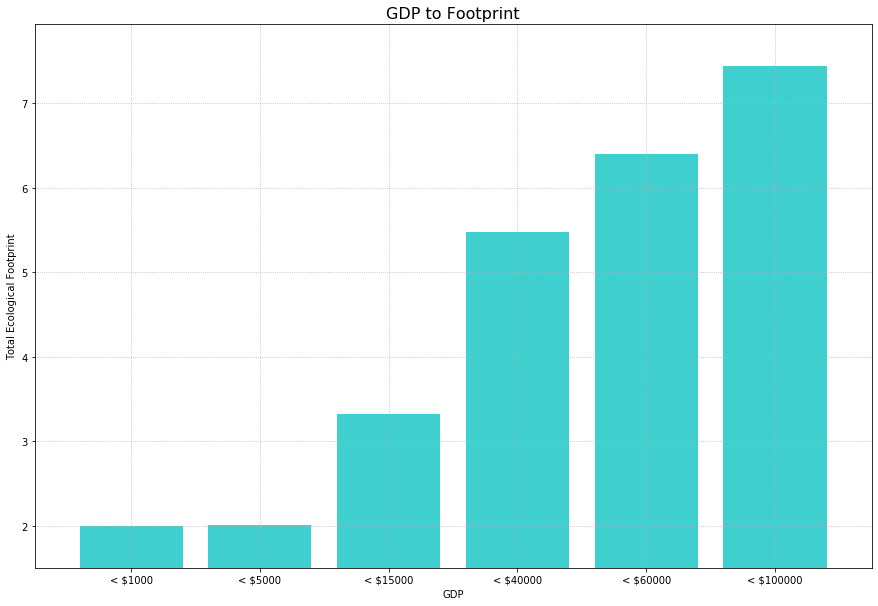

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
ticks = eco_4_plot.index
x_ticks = np.arange(len(ticks))
y_values = eco_4_plot["Total Ecological Footprint"].tolist()
ax.set_xticks(x_ticks)
plt.xlim(-0.75, len(x_ticks)-0.25)
plt.ylim(min(y_values)-.5, max(y_values)+.5)

# Color the bars        
bar_color = []
for change in y_values:
    if change <= 0:
        bar_color.append('r')
    else:
        bar_color.append('c')

plt.bar(ticks, y_values, alpha=0.75, width=.80,align="center", color=bar_color)



# Set the xlabel and ylabel using class methods
plt.title("GDP to Footprint", fontsize=16)
plt.xlabel("GDP")
plt.ylabel("Total Ecological Footprint")
plt.grid(linestyle='dotted')

In [30]:
country = merged_df["Country"]
# country = country.groupby("Region").count()
tot_ecofootprint = merged_df["Total Ecological Footprint"]
tot_ecofootprint = tot_ecofootprint.groupby("Region").mean()
def_res = merged_df["Biocapacity Deficit or Reserve"]
def_res = def_res.groupby("Region").mean()
gdp = merged_df["GDP per Capita"]
gdp = gdp.groupby("Region").mean()